In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import data_engineering_library as dlib

In [3]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframe_London_UTD19 = dlib.load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [4]:
dataframe_London_UTD19_raw = dataframe_London_UTD19.copy()

In [5]:
# Drop the error column, because it is not needed
dataframe_London_UTD19 = dlib.preprocess_dataframe(dataframe_London_UTD19)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [6]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

6452

In [7]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='flow', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 6464


,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday


In [8]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='occ', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 18508


,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday


In [9]:
#Calculate the speed using the formula speed = flow / occupancy
dataframe_London_UTD19 = dlib.calculate_traffic_speed(dataframe_London_UTD19)
dataframe_London_UTD19_raw = dlib.calculate_traffic_speed(dataframe_London_UTD19_raw)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000


In [10]:
dataframe_London_UTD19 = dlib.drop_outliers(dataframe_London_UTD19, column='traffic', group_by_detid=True)
dataframe_London_UTD19.head()

Total outliers dropped: 24519


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000


In [11]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='traffic')
dataframe_London_UTD19.head()

Total outliers detected and removed: 138000


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [12]:
dataframe_London_UTD19 = dlib.drop_false_values(dataframe_London_UTD19, column='traffic', outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers detected and removed: 55405


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [13]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

150


In [ ]:
anomlies_df = dlib.detect_anomalies(dataframe_London_UTD19, column='traffic', min_IQR=5, min_data_points=5000)

Anomalies detected based on IQR: 2
Anomalies detected based on IQR too small: 15
Anomalies detected based on not enough data: 107


In [15]:
len(anomlies_df)

109

In [16]:
dataframe_London_UTD19, anomlies_df = dlib.handle_anomalies(dataframe_London_UTD19, anomlies_df)

Anomalies with not enough data handled: 25
Total amount of dropeed anomalies: 84


In [17]:
handeled_anomalies_df = dlib.handle_detectors_with_bad_days(dataframe_London_UTD19, anomlies_df)
handeled_anomalies_df = handeled_anomalies_df[
    handeled_anomalies_df[['mean_out_of_bound', 'IQR_to_small', 'not_enough_data']].any(axis=1)
]
len(handeled_anomalies_df)

Anomalies with not enough data handled: 0


107

In [18]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

0

In [286]:
anomalies = handeled_anomalies_df['detid'].unique()
dataframe_London_UTD19 = dataframe_London_UTD19[~dataframe_London_UTD19['detid'].isin(anomalies)]

In [19]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

43


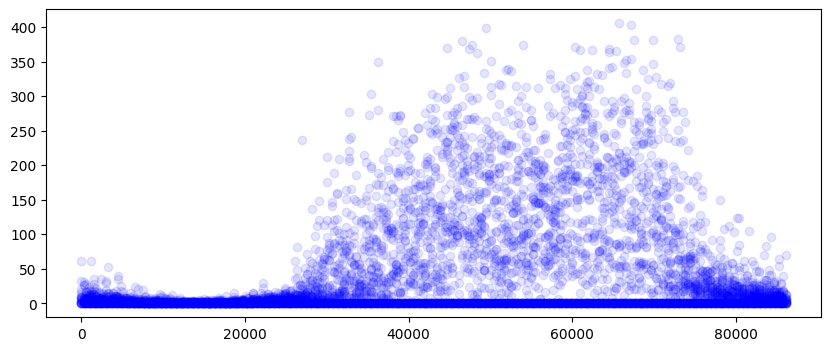

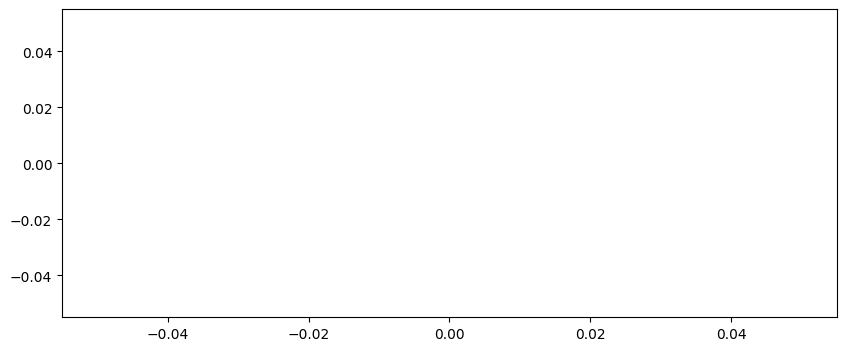

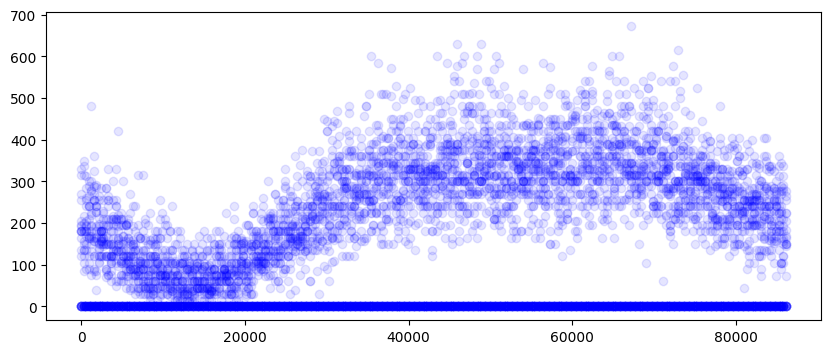

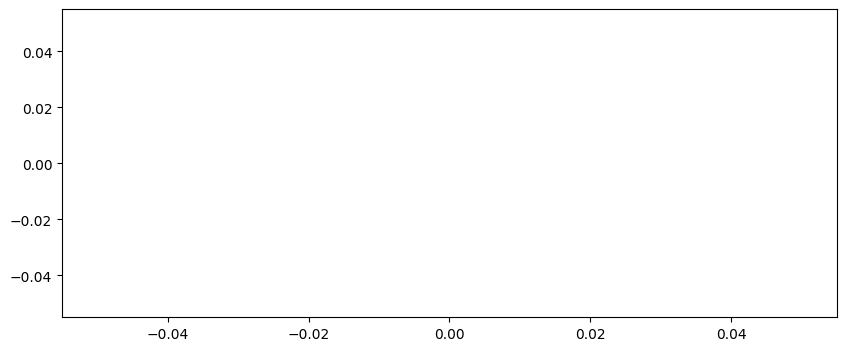

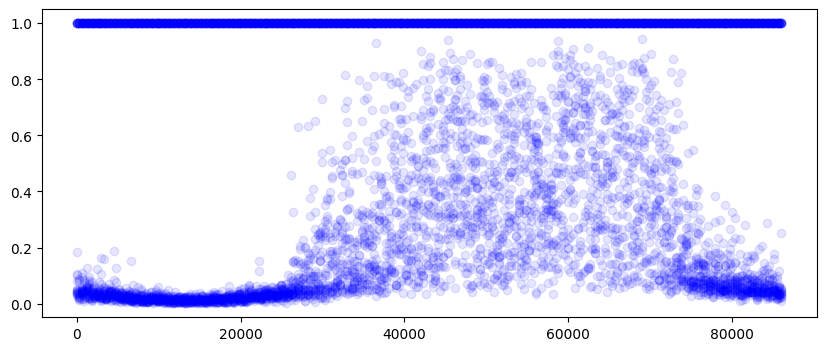

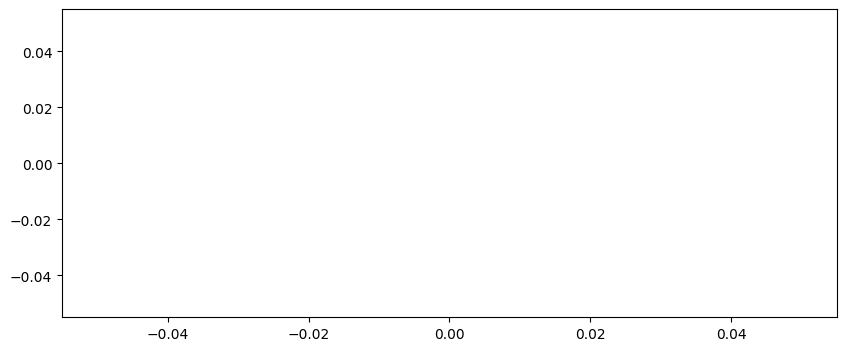

In [288]:
#Plot the speed, traffic and occ of a random detector
dataframe_detector = dataframe_London_UTD19_raw[dataframe_London_UTD19_raw['detid'] == 'EAST_N17/121b1']
dataframe_detector_clean = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1']
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['traffic'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['flow'], alpha=0.1, color='blue')                                  
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['flow'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['occ'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['occ'], alpha=0.1, color='red')
plt.show()

In [289]:
# select a random detector
unique_detectors = dataframe_London_UTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N01/357q1


,day,interval,detid,flow,occ,city,weekday,traffic
270962,2015-05-15,0,CNTR_N01/357q1,900.0,0.251667,london,Friday,226.499994
270963,2015-05-15,300,CNTR_N01/357q1,864.0,0.257500,london,Friday,222.479983
270964,2015-05-15,900,CNTR_N01/357q1,852.0,0.289167,london,Friday,246.369994
270965,2015-05-15,1200,CNTR_N01/357q1,876.0,0.268333,london,Friday,235.059988
270966,2015-05-15,1500,CNTR_N01/357q1,792.0,0.218333,london,Friday,172.920005


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1
- CNTR_N01/009u1
- CNTR_N01/105b2

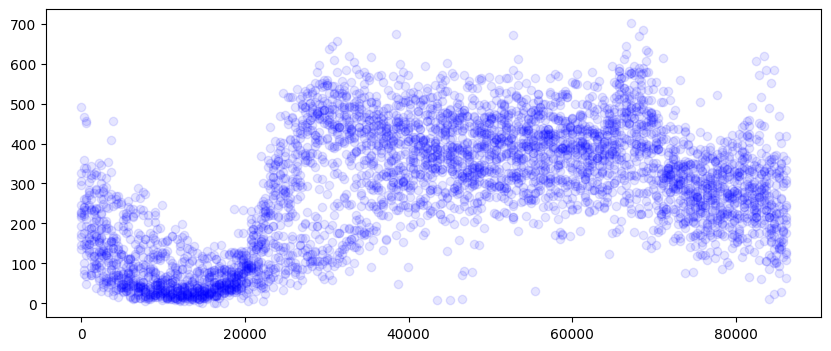

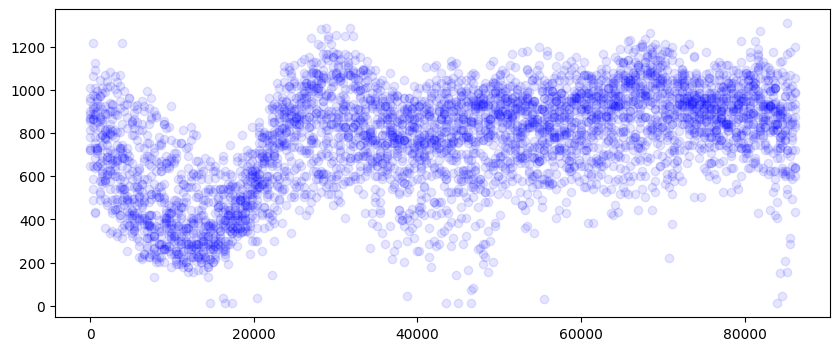

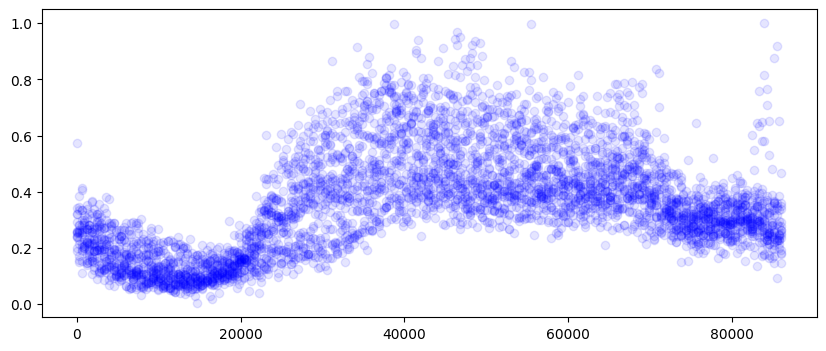

In [290]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [291]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Saturday


,day,interval,detid,flow,occ,city,weekday,traffic
271224,2015-05-16,0,CNTR_N01/357q1,720.0,0.187500,london,Saturday,135.000000
271225,2015-05-16,300,CNTR_N01/357q1,828.0,0.213333,london,Saturday,176.640006
271226,2015-05-16,600,CNTR_N01/357q1,780.0,0.248333,london,Saturday,193.700021
271227,2015-05-16,900,CNTR_N01/357q1,924.0,0.294167,london,Saturday,271.809994
271228,2015-05-16,1200,CNTR_N01/357q1,828.0,0.227500,london,Saturday,188.370000


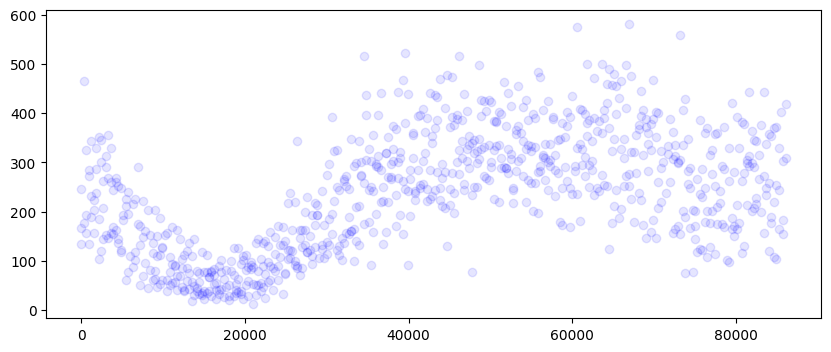

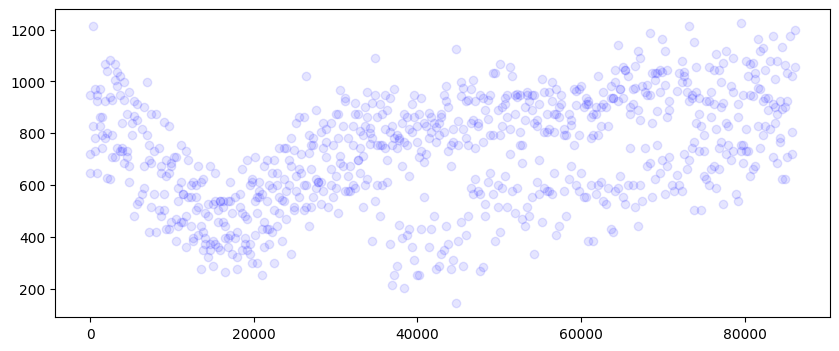

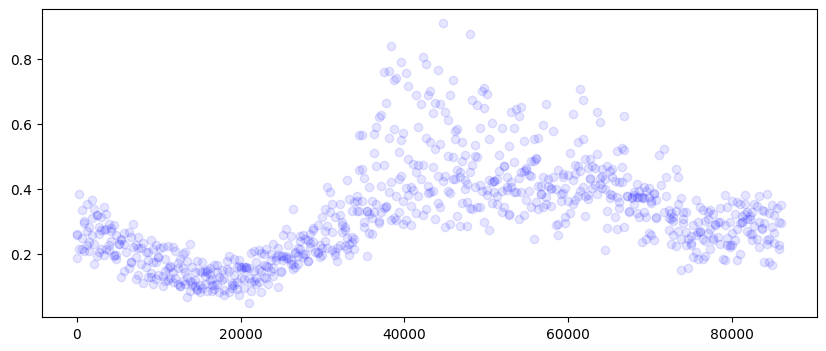

In [292]:
#Plot the speed, traffic an occ of a random detector on a random day
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()

In [293]:
dataframe_London_UTD19_mean = dataframe_London_UTD19.copy()
dataframe_London_UTD19_mean['interval'] = (dataframe_London_UTD19_mean['interval'] / 1500).round() * 1000
dataframe_London_UTD19_mean.head(20)

,day,interval,detid,flow,occ,city,weekday,traffic
30789,2015-05-15,0.0,CNTR_N01/009w1,216.00000,0.419167,london,Friday,90.540003
30790,2015-05-15,0.0,CNTR_N01/009w1,312.00000,0.408333,london,Friday,127.399996
30791,2015-05-15,0.0,CNTR_N01/009w1,336.00000,0.313333,london,Friday,105.279996
30792,2015-05-15,1000.0,CNTR_N01/009w1,420.00000,0.201667,london,Friday,84.700006
30793,2015-05-15,1000.0,CNTR_N01/009w1,372.00000,0.341667,london,Friday,127.099998
30794,2015-05-15,1000.0,CNTR_N01/009w1,480.00000,0.288333,london,Friday,138.399994
30795,2015-05-15,1000.0,CNTR_N01/009w1,351.45764,0.443249,london,Friday,155.783100
30796,2015-05-15,1000.0,CNTR_N01/009w1,373.01694,0.344788,london,Friday,128.611809
30797,2015-05-15,2000.0,CNTR_N01/009w1,363.31034,0.411724,london,Friday,149.583630
30798,2015-05-15,2000.0,CNTR_N01/009w1,264.00000,0.313333,london,Friday,82.720002


In [294]:
grouped_mean = dataframe_London_UTD19_mean.groupby(['interval', 'day', 'detid', 'weekday']).mean('traffic').reset_index()
grouped_mean.head()


,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N01/009w1,Friday,288.0,0.380278,107.739998
1,0.0,2015-05-15,CNTR_N01/010a1,Friday,684.0,0.495417,339.720016
2,0.0,2015-05-15,CNTR_N01/010x1,Friday,324.0,0.704167,224.130000
3,0.0,2015-05-15,CNTR_N01/010x2,Friday,528.0,0.263889,136.626668
4,0.0,2015-05-15,CNTR_N01/067k1,Friday,534.0,0.308333,163.824998


In [295]:
grouped_mean = dataframe_London_UTD19.copy()
grouped_mean = dlib.combine_datapoints(grouped_mean, ratio= 1500)
grouped_mean.head()

,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N01/009w1,Friday,288.0,0.380278,107.739998
1,0.0,2015-05-15,CNTR_N01/010a1,Friday,684.0,0.495417,339.720016
2,0.0,2015-05-15,CNTR_N01/010x1,Friday,324.0,0.704167,224.130000
3,0.0,2015-05-15,CNTR_N01/010x2,Friday,528.0,0.263889,136.626668
4,0.0,2015-05-15,CNTR_N01/067k1,Friday,534.0,0.308333,163.824998


Selected detector: CNTR_N12/003x1


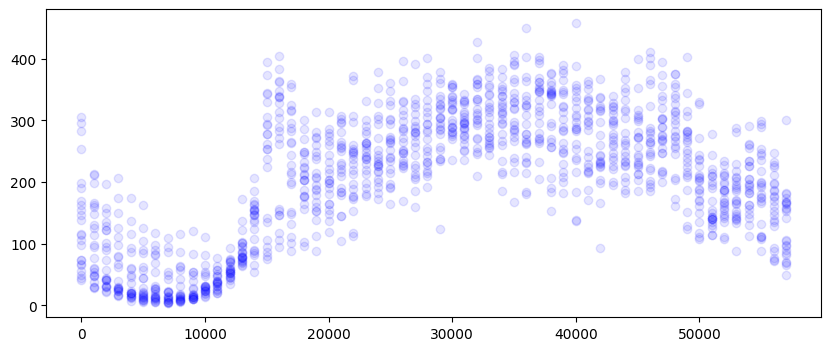

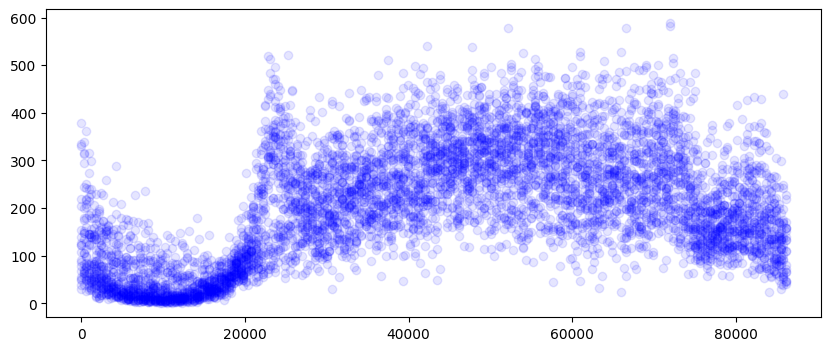

In [296]:
unique_detectors = grouped_mean['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
print(f"Selected detector: {random_detector}")
dataframe_detector = grouped_mean[grouped_mean['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()
dataframe_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()

